In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [2]:
# Plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Show all columns when inspecting dataframes
pd.set_option("display.max_columns", None)

In [3]:
# Adjust this path if your notebook is not one level below "data"
DATA_DIR = Path("../data/fake-and-real-news-datas")

DATA_DIR, list(DATA_DIR.glob("*"))

(WindowsPath('../data/fake-and-real-news-datas'),
 [WindowsPath('../data/fake-and-real-news-datas/Fake.csv'),
  WindowsPath('../data/fake-and-real-news-datas/True.csv')])

In [4]:
# Load ISOT Fake & Real News dataset (two separate files)
fake_path = DATA_DIR / "Fake.csv"
true_path = DATA_DIR / "True.csv"

fake_df = pd.read_csv(fake_path)
true_df = pd.read_csv(true_path)

print("Fake shape:", fake_df.shape)
print("True shape:", true_df.shape)

fake_df.head()

Fake shape: (23481, 4)
True shape: (21417, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
# Add label: 0 = fake, 1 = real (you can also store text labels)
fake_df["label"] = 0
true_df["label"] = 1

fake_df["label_name"] = "fake"
true_df["label_name"] = "real"

# Combine into a single dataframe
isot_df = pd.concat([fake_df, true_df], ignore_index=True)

print("Combined ISOT dataset shape:", isot_df.shape)
isot_df.head()

Combined ISOT dataset shape: (44898, 6)


,title,text,subject,date,label,label_name
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,fake


In [6]:
isot_df["source_dataset"] = "ISOT"

In [7]:
welfake_path = "../data/WELFake/preprocessed_welfake.csv"  # change name if different

welfake_df = pd.read_csv(welfake_path)
print("WELFake shape:", welfake_df.shape)
welfake_df.head()

WELFake shape: (71537, 15)


,title,text,label,language,punctuation_count,uppercase_ratio,numerical_count,sentiment_polarity,processed_title,processed_text,title_len,text_len,total_len,combined_processed_text,combined_text_title
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,en,182,0.031888,30,0.080000,"['law', 'enforcement', 'high', 'alert', 'follo...","['no_comment', 'expect', 'back', 'drama', 'mem...",130,5049,5179,"['law', 'enforcement', 'high', 'alert', 'follo...",LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,en,2,0.023148,0,0.121875,"['unbelievable', 'drama', 'attorney', 'general...","['demonstrator', 'gather', 'last', 'night', 'e...",137,216,353,"['unbelievable', 'drama', 'attorney', 'general...",UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
2,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,en,154,0.030712,34,0.000000,"['bobby', 'final', 'raise', 'hindu', 'us', 'st...","['dozen', 'politically', 'active', 'pastor', '...",105,8010,8115,"['bobby', 'final', 'raise', 'hindu', 'us', 'st...","Bobby Jindal, raised Hindu, uses story of Chri..."
3,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,en,42,0.064196,70,-0.287879,"['satan', 'russia', 'unvelis', 'image', 'terri...","['rs28', 'format', 'missile', 'dub', 'satan', ...",95,1916,2011,"['satan', 'russia', 'unvelis', 'image', 'terri...",SATAN 2: Russia unvelis an image of its terrif...
4,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,en,41,0.063399,0,-0.400000,"['time', 'christian', 'group', 'see', 'amazon'...","['say', 'one', 'time', 'someone', 'sue', 'sout...",78,1530,1608,"['time', 'christian', 'group', 'see', 'amazon'...",About Time! Christian Group Sues Amazon and SP...


In [8]:
# Common index column names that may appear
index_like_cols = [
    col
    for col in welfake_df.columns
    if col.lower() in ["unnamed: 0", "serial", "serial_number", "index"]
]

if index_like_cols:
    print("Dropping index-like columns:", index_like_cols)
    welfake_df = welfake_df.drop(columns=index_like_cols)

welfake_df.head()

,title,text,label,language,punctuation_count,uppercase_ratio,numerical_count,sentiment_polarity,processed_title,processed_text,title_len,text_len,total_len,combined_processed_text,combined_text_title
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,en,182,0.031888,30,0.080000,"['law', 'enforcement', 'high', 'alert', 'follo...","['no_comment', 'expect', 'back', 'drama', 'mem...",130,5049,5179,"['law', 'enforcement', 'high', 'alert', 'follo...",LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,en,2,0.023148,0,0.121875,"['unbelievable', 'drama', 'attorney', 'general...","['demonstrator', 'gather', 'last', 'night', 'e...",137,216,353,"['unbelievable', 'drama', 'attorney', 'general...",UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
2,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,en,154,0.030712,34,0.000000,"['bobby', 'final', 'raise', 'hindu', 'us', 'st...","['dozen', 'politically', 'active', 'pastor', '...",105,8010,8115,"['bobby', 'final', 'raise', 'hindu', 'us', 'st...","Bobby Jindal, raised Hindu, uses story of Chri..."
3,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,en,42,0.064196,70,-0.287879,"['satan', 'russia', 'unvelis', 'image', 'terri...","['rs28', 'format', 'missile', 'dub', 'satan', ...",95,1916,2011,"['satan', 'russia', 'unvelis', 'image', 'terri...",SATAN 2: Russia unvelis an image of its terrif...
4,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,en,41,0.063399,0,-0.400000,"['time', 'christian', 'group', 'see', 'amazon'...","['say', 'one', 'time', 'someone', 'sue', 'sout...",78,1530,1608,"['time', 'christian', 'group', 'see', 'amazon'...",About Time! Christian Group Sues Amazon and SP...


In [9]:
f"column name:- ",welfake_df.columns[-1],welfake_df["label"].unique()

('column name:- ', 'combined_text_title', array([1, 0], dtype=int64))

In [10]:
# Ensure labels are int and add a human-readable label_name
welfake_df["label"] = welfake_df["label"].astype(int)
welfake_df["label_name"] = welfake_df["label"].map({0: "fake", 1: "real"})

# Add dataset indicator
welfake_df["source_dataset"] = "WELFake"

welfake_df.head()

,title,text,label,language,punctuation_count,uppercase_ratio,numerical_count,sentiment_polarity,processed_title,processed_text,title_len,text_len,total_len,combined_processed_text,combined_text_title,label_name,source_dataset
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,en,182,0.031888,30,0.080000,"['law', 'enforcement', 'high', 'alert', 'follo...","['no_comment', 'expect', 'back', 'drama', 'mem...",130,5049,5179,"['law', 'enforcement', 'high', 'alert', 'follo...",LAW ENFORCEMENT ON HIGH ALERT Following Threat...,real,WELFake
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,en,2,0.023148,0,0.121875,"['unbelievable', 'drama', 'attorney', 'general...","['demonstrator', 'gather', 'last', 'night', 'e...",137,216,353,"['unbelievable', 'drama', 'attorney', 'general...",UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,real,WELFake
2,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,en,154,0.030712,34,0.000000,"['bobby', 'final', 'raise', 'hindu', 'us', 'st...","['dozen', 'politically', 'active', 'pastor', '...",105,8010,8115,"['bobby', 'final', 'raise', 'hindu', 'us', 'st...","Bobby Jindal, raised Hindu, uses story of Chri...",fake,WELFake
3,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,en,42,0.064196,70,-0.287879,"['satan', 'russia', 'unvelis', 'image', 'terri...","['rs28', 'format', 'missile', 'dub', 'satan', ...",95,1916,2011,"['satan', 'russia', 'unvelis', 'image', 'terri...",SATAN 2: Russia unvelis an image of its terrif...,real,WELFake
4,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,en,41,0.063399,0,-0.400000,"['time', 'christian', 'group', 'see', 'amazon'...","['say', 'one', 'time', 'someone', 'sue', 'sout...",78,1530,1608,"['time', 'christian', 'group', 'see', 'amazon'...",About Time! Christian Group Sues Amazon and SP...,real,WELFake


In [11]:
print("ISOT columns:", isot_df.columns.tolist())
print("WELFake columns:", welfake_df.columns.tolist())

print("\nMissing values (ISOT):")
print(isot_df.isna().sum())

print("\nMissing values (WELFake):")
print(welfake_df.isna().sum())

ISOT columns: ['title', 'text', 'subject', 'date', 'label', 'label_name', 'source_dataset']
WELFake columns: ['title', 'text', 'label', 'language', 'punctuation_count', 'uppercase_ratio', 'numerical_count', 'sentiment_polarity', 'processed_title', 'processed_text', 'title_len', 'text_len', 'total_len', 'combined_processed_text', 'combined_text_title', 'label_name', 'source_dataset']

Missing values (ISOT):
title             0
text              0
subject           0
date              0
label             0
label_name        0
source_dataset    0
dtype: int64

Missing values (WELFake):
title                      0
text                       0
label                      0
language                   0
punctuation_count          0
uppercase_ratio            0
numerical_count            0
sentiment_polarity         0
processed_title            0
processed_text             0
title_len                  0
text_len                   0
total_len                  0
combined_processed_text    0
comb

In [12]:
# Drop rows with missing or empty title/text


def clean_basic(df, dataset_name):
    before = len(df)
    df = df.dropna(subset=["title", "text"])
    df = df[(df["title"].str.strip() != "") & (df["text"].str.strip() != "")]
    after = len(df)
    print(f"{dataset_name}: removed {before - after} rows with empty title/text.")

    # Drop duplicate texts (optional, but helpful)
    before = len(df)
    df = df.drop_duplicates(subset=["title", "text"])
    after = len(df)
    print(f"{dataset_name}: removed {before - after} duplicate rows.")

    return df


isot_df = clean_basic(isot_df, "ISOT")
welfake_df = clean_basic(welfake_df, "WELFake")

ISOT: removed 631 rows with empty title/text.
ISOT: removed 5609 duplicate rows.
WELFake: removed 744 rows with empty title/text.
WELFake: removed 8201 duplicate rows.


In [13]:
isot_df.shape

(38658, 7)

In [14]:
welfake_df.shape

(62592, 17)

In [15]:
isot_class_counts = isot_df["label_name"].value_counts().sort_index()
isot_class_counts

label_name
fake    17462
real    21196
Name: count, dtype: int64

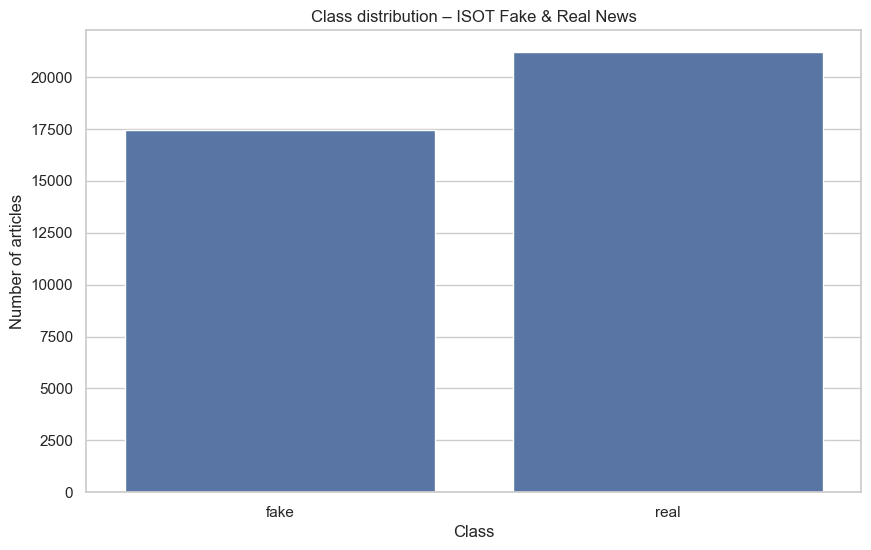

In [16]:
sns.barplot(x=isot_class_counts.index, y=isot_class_counts.values)
plt.title("Class distribution – ISOT Fake & Real News")
plt.xlabel("Class")
plt.ylabel("Number of articles")
plt.show()

In [17]:
welfake_class_counts = welfake_df["label_name"].value_counts().sort_index()
welfake_class_counts

label_name
fake    34790
real    27802
Name: count, dtype: int64

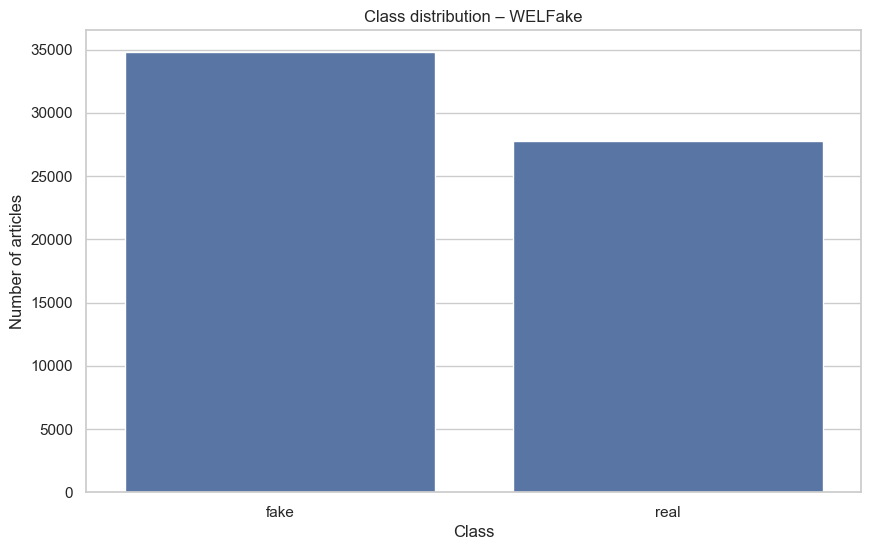

In [18]:
sns.barplot(x=welfake_class_counts.index, y=welfake_class_counts.values)
plt.title("Class distribution – WELFake")
plt.xlabel("Class")
plt.ylabel("Number of articles")
plt.show()

In [19]:
def add_length_features(df):
    # Number of words in title and text
    df["title_len_words"] = df["title"].str.split().str.len()
    df["text_len_words"] = df["text"].str.split().str.len()

    # Number of characters (optional)
    df["title_len_chars"] = df["title"].str.len()
    df["text_len_chars"] = df["text"].str.len()

    return df


isot_df = add_length_features(isot_df)
welfake_df = add_length_features(welfake_df)

isot_df[["title_len_words", "text_len_words"]].describe()

,title_len_words,text_len_words
count,38658.000000,38658.000000
mean,11.924543,403.130659
std,3.658152,313.868903
min,1.000000,1.000000
25%,9.000000,216.000000
50%,11.000000,369.000000
75%,14.000000,511.000000
max,42.000000,8135.000000


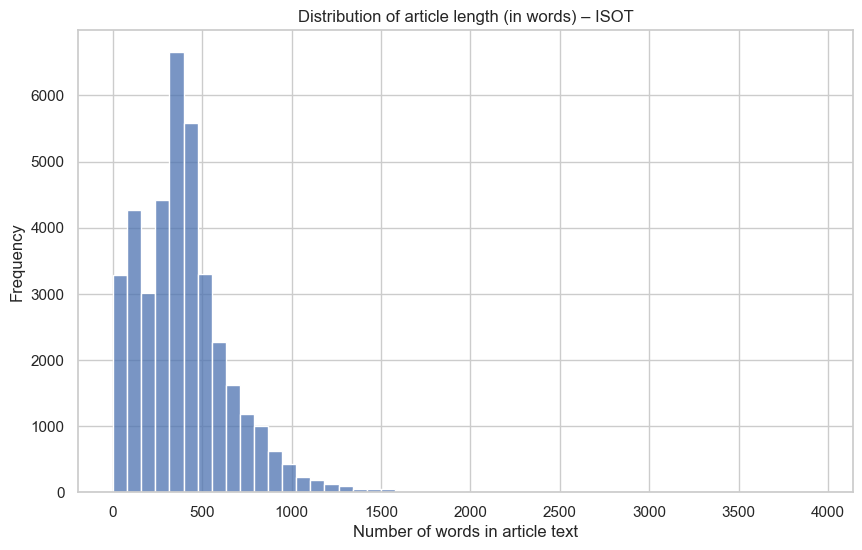

In [20]:
# Limit very long texts for nicer plots
subset_isot = isot_df[isot_df["text_len_words"] < 4000]

sns.histplot(subset_isot["text_len_words"], bins=50, kde=False)
plt.title("Distribution of article length (in words) – ISOT")
plt.xlabel("Number of words in article text")
plt.ylabel("Frequency")
plt.show()

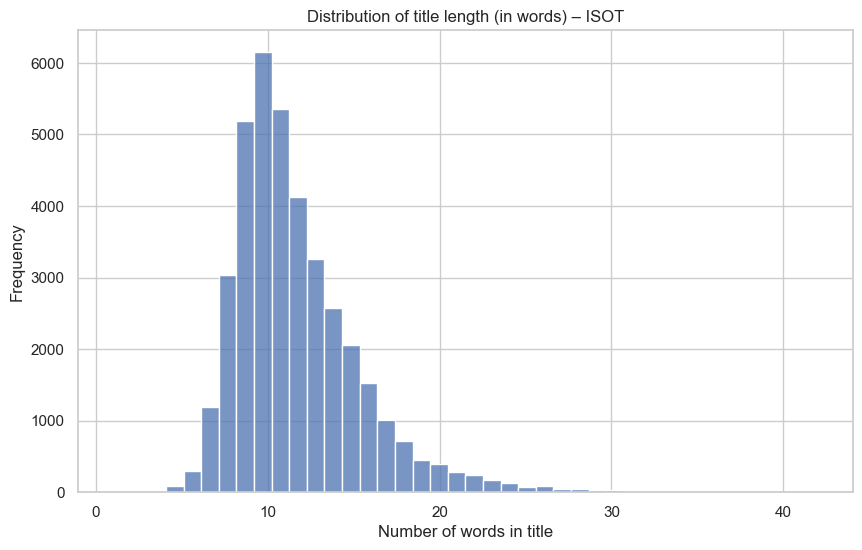

In [21]:
sns.histplot(isot_df["title_len_words"], bins=40, kde=False)
plt.title("Distribution of title length (in words) – ISOT")
plt.xlabel("Number of words in title")
plt.ylabel("Frequency")
plt.show()

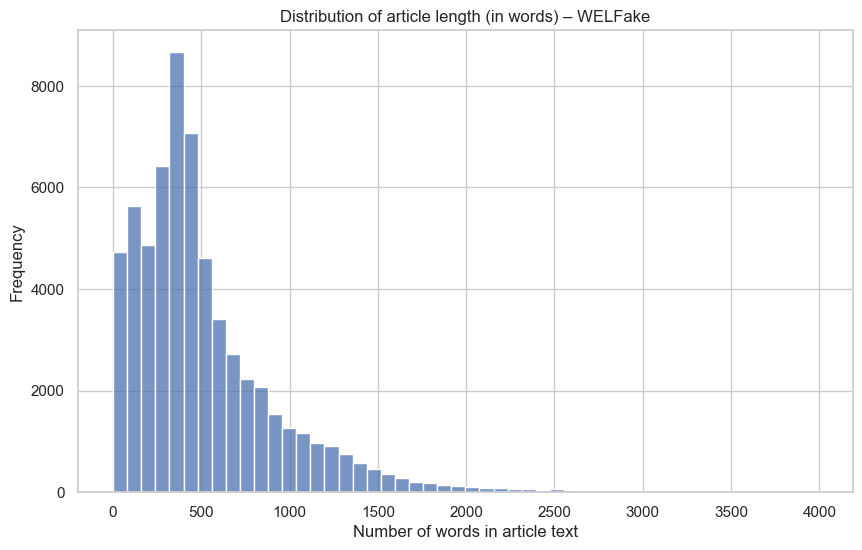

In [22]:
subset_welfake = welfake_df[welfake_df["text_len_words"] < 4000]

sns.histplot(subset_welfake["text_len_words"], bins=50, kde=False)
plt.title("Distribution of article length (in words) – WELFake")
plt.xlabel("Number of words in article text")
plt.ylabel("Frequency")
plt.show()

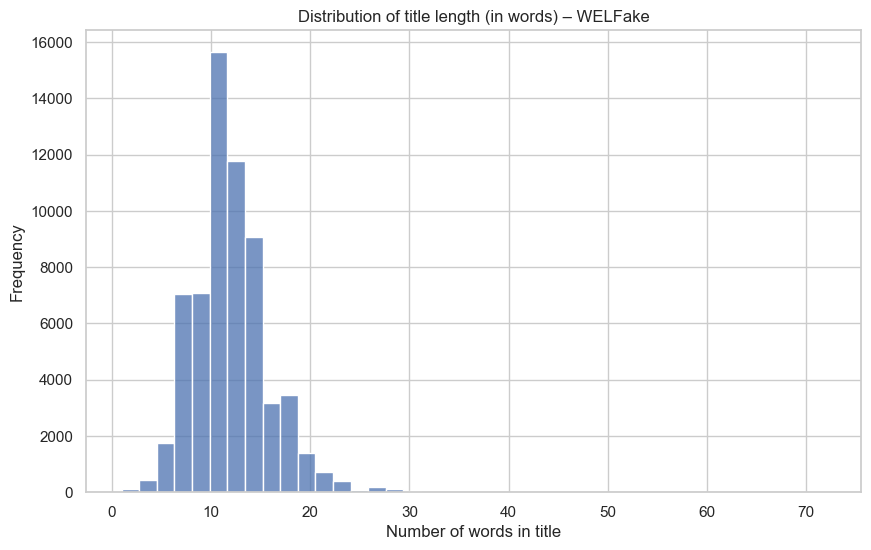

In [23]:
sns.histplot(welfake_df["title_len_words"], bins=40, kde=False)
plt.title("Distribution of title length (in words) – WELFake")
plt.xlabel("Number of words in title")
plt.ylabel("Frequency")
plt.show()

In [24]:
# Average lengths per class in ISOT
isot_df.groupby("label_name")[["title_len_words", "text_len_words"]].mean()

,title_len_words,text_len_words
label_name,,
fake,14.319551,425.281984
real,9.951453,384.881629


In [25]:
# Average lengths per class in WELFake
welfake_df.groupby("label_name")[["title_len_words", "text_len_words"]].mean()

,title_len_words,text_len_words
label_name,,
fake,11.052486,578.268899
real,13.118517,517.500000


In [26]:
isot_df["subject"].value_counts()

subject
politicsNews       11216
worldnews           9980
News                9050
politics            6430
US_News              783
left-news            684
Government News      515
Name: count, dtype: int64

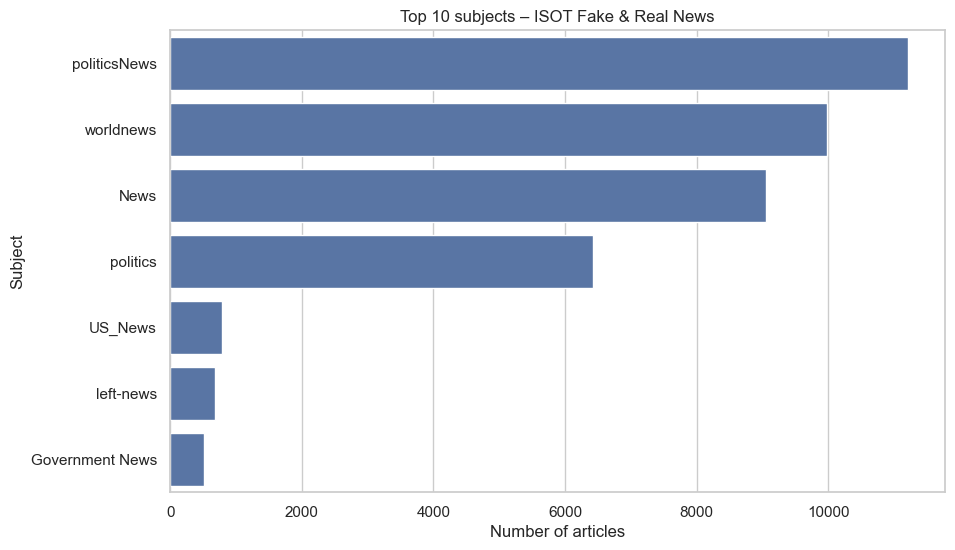

In [27]:
top_n = 10
subject_counts = isot_df["subject"].value_counts().head(top_n)

sns.barplot(y=subject_counts.index, x=subject_counts.values)
plt.title(f"Top {top_n} subjects – ISOT Fake & Real News")
plt.xlabel("Number of articles")
plt.ylabel("Subject")
plt.show()

In [28]:
subject_class = (
    isot_df.groupby(["subject", "label_name"]).size().reset_index(name="count")
)

subject_class.head()

,subject,label_name,count
0,Government News,fake,515
1,News,fake,9050
2,US_News,fake,783
3,left-news,fake,684
4,politics,fake,6430


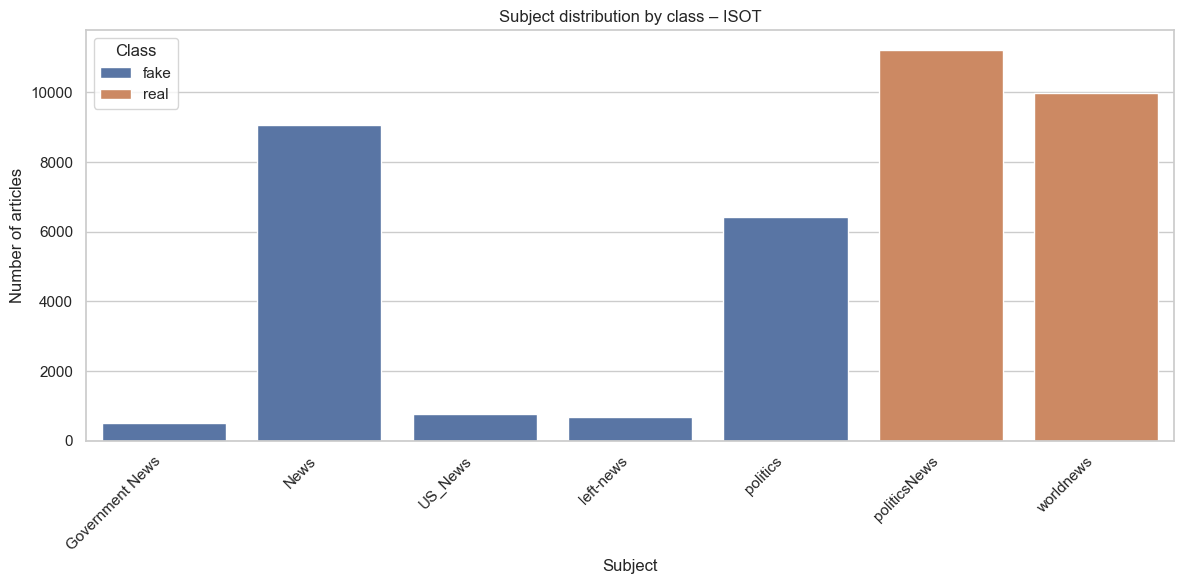

In [29]:
# Keep only subjects with at least 500 articles (tune as you like)
subject_totals = isot_df["subject"].value_counts()
big_subjects = subject_totals[subject_totals >= 500].index

subset = subject_class[subject_class["subject"].isin(big_subjects)]

plt.figure(figsize=(12, 6))
sns.barplot(data=subset, x="subject", y="count", hue="label_name")
plt.title("Subject distribution by class – ISOT")
plt.xlabel("Subject")
plt.ylabel("Number of articles")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Class")
plt.tight_layout()
plt.show()

In [30]:
combined_df = pd.concat([isot_df, welfake_df], ignore_index=True)

combined_df[["source_dataset", "label_name"]].value_counts()

source_dataset  label_name
WELFake         fake          34790
                real          27802
ISOT            real          21196
                fake          17462
Name: count, dtype: int64

In [31]:
combined_df

,title,text,subject,date,label,label_name,source_dataset,title_len_words,text_len_words,title_len_chars,text_len_chars,language,punctuation_count,uppercase_ratio,numerical_count,sentiment_polarity,processed_title,processed_text,title_len,text_len,total_len,combined_processed_text,combined_text_title
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,fake,ISOT,12,495,79,2893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,fake,ISOT,8,305,69,1898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,fake,ISOT,15,580,90,3597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,fake,ISOT,14,444,78,2774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,fake,ISOT,11,420,70,2346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101245,WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...,An email released by WikiLeaks on Sunday appea...,NaN,NaN,1,real,WELFake,15,205,104,1237,en,24.0,0.041229,0.0,0.0,"['wikileaks', 'email', 'show', 'clinton', 'fou...","['email', 'release', 'wikileaks', 'sunday', 'a...",104.0,1237.0,1341.0,"['wikileaks', 'email', 'show', 'clinton', 'fou...",WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...
101246,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,NaN,NaN,0,fake,WELFake,11,735,65,4788,en,105.0,0.038012,35.0,0.0,"['russian', 'steal', 'research', 'tramp', 'hac...","['washington', 'renter', 'hawker', 'believe', ...",65.0,4788.0,4853.0,"['russian', 'steal', 'research', 'tramp', 'hac...",Russians steal research on Trump in hack of U....
101247,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",NaN,NaN,1,real,WELFake,10,604,79,3634,en,51.0,0.033021,17.0,0.0,"['watch', 'giuliani', 'demand', 'democrat', 'a...","['know', 'fantasyland', 'republican', 'never_q...",79.0,3634.0,3713.0,"['watch', 'giuliani', 'demand', 'democrat', 'a...",WATCH: Giuliani Demands That Democrats Apolog...
101248,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,NaN,NaN,0,fake,WELFake,10,477,57,2864,en,85.0,0.036662,10.0,0.0,"['emigrant', 'refuse', 'leave', 'train', 'refu...","['emigrant', 'refuse', 'leave', 'train', 'refu...",57.0,2864.0,2921.0,"['emigrant', 'refuse', 'leave', 'train', 'refu...",Migrants Refuse To Leave Train At Refugee Camp...


In [32]:
import re


def basic_clean(text: str) -> str:
    """
    Basic text normalization:
    - lowercasing
    - removing URLs and HTML tags
    - removing non-letter characters
    - collapsing multiple spaces
    """
    if not isinstance(text, str):
        text = str(text)

    # lowercase
    text = text.lower()

    # remove URLs
    text = re.sub(r"https?://\S+|www\.\S+", " ", text)

    # remove HTML tags
    text = re.sub(r"<.*?>", " ", text)

    # keep only letters and spaces
    text = re.sub(r"[^a-z\s]", " ", text)

    # collapse multiple spaces
    text = re.sub(r"\s+", " ", text).strip()

    return text


# Apply cleaning to title and text
combined_df["title_clean"] = combined_df["title"].apply(basic_clean)
combined_df["text_clean"] = combined_df["text"].apply(basic_clean)

combined_df[["title", "title_clean", "text_clean"]].head()

,title,title_clean,text_clean
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump sends out embarrassing new year s...,donald trump just couldn t wish all americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,sheriff david clarke becomes an internet joke ...,on friday it was revealed that former milwauke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,trump is so obsessed he even has obama s name ...,on christmas day donald trump announced that h...
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis just called out donald trump duri...,pope francis used his annual christmas day mes...


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Sanity check: make sure these columns exist
print("Columns in combined_df:", combined_df.columns.tolist())

Columns in combined_df: ['title', 'text', 'subject', 'date', 'label', 'label_name', 'source_dataset', 'title_len_words', 'text_len_words', 'title_len_chars', 'text_len_chars', 'language', 'punctuation_count', 'uppercase_ratio', 'numerical_count', 'sentiment_polarity', 'processed_title', 'processed_text', 'title_len', 'text_len', 'total_len', 'combined_processed_text', 'combined_text_title', 'title_clean', 'text_clean']


In [34]:
# TF-IDF for titles
tfidf_title = TfidfVectorizer(
    ngram_range=(1, 2), max_features=20000, min_df=5, stop_words="english"
)

# TF-IDF for article bodies
tfidf_text = TfidfVectorizer(
    ngram_range=(1, 2), max_features=50000, min_df=5, stop_words="english"
)

# Fit and transform
X_title = tfidf_title.fit_transform(combined_df["title_clean"])
X_text = tfidf_text.fit_transform(combined_df["text_clean"])

print("Title TF-IDF shape:", X_title.shape)
print("Text TF-IDF shape:", X_text.shape)

Title TF-IDF shape: (101250, 20000)
Text TF-IDF shape: (101250, 50000)


In [35]:
# Combine title and text TF-IDF features horizontally
X_combined = hstack([X_title, X_text])

print("Combined feature matrix shape:", X_combined.shape)

# Label vector (assuming 'label' is already 0/1 as we set before)
y = combined_df["label"].astype(int).values

print("Label shape:", y.shape)
print("Label distribution:", np.bincount(y))

Combined feature matrix shape: (101250, 70000)
Label shape: (101250,)
Label distribution: [52252 48998]


In [36]:
# Example: show some of the learned vocabulary for titles
list(tfidf_title.vocabulary_.keys())[:20]

['donald',
 'trump',
 'sends',
 'embarrassing',
 'new',
 'year',
 'eve',
 'message',
 'disturbing',
 'donald trump',
 'trump sends',
 'new year',
 'year eve',
 'drunk',
 'bragging',
 'staffer',
 'started',
 'russian',
 'collusion',
 'investigation']

In [37]:
print("Number of title features:", len(tfidf_title.vocabulary_))
print("Number of text features:", len(tfidf_text.vocabulary_))

Number of title features: 20000
Number of text features: 50000


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

In [39]:
print(X_title.shape, X_text.shape, X_combined.shape, y.shape)

(101250, 20000) (101250, 50000) (101250, 70000) (101250,)


In [40]:
from sklearn.model_selection import train_test_split


# Helper function to split any feature matrix with the same labels y
def make_train_test_split(X, y, test_size=0.2, random_state=42):
    return train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )


X_title_train, X_title_test, y_train, y_test = make_train_test_split(X_title, y)
X_text_train, X_text_test, _, _ = make_train_test_split(X_text, y)
X_comb_train, X_comb_test, _, _ = make_train_test_split(X_combined, y)

print("Title train/test:", X_title_train.shape, X_title_test.shape)
print("Text train/test :", X_text_train.shape, X_text_test.shape)
print("Comb train/test :", X_comb_train.shape, X_comb_test.shape)
print("y_train / y_test:", y_train.shape, y_test.shape)

Title train/test: (81000, 20000) (20250, 20000)
Text train/test : (81000, 50000) (20250, 50000)
Comb train/test : (81000, 70000) (20250, 70000)
y_train / y_test: (81000,) (20250,)


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    roc_auc_score,
    confusion_matrix,
)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test, is_svm=False):
    """
    Fit the model, compute predictions, and print evaluation metrics.
    If is_svm=True, use decision_function for ROC-AUC instead of predict_proba.
    """
    print(f"\n===== {name} =====")

    # Fit
    model.fit(X_train, y_train)

    # Predict labels
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average="binary", pos_label=1
    )

    # For ROC-AUC we need scores
    if is_svm:
        # LinearSVC: use decision_function
        scores = model.decision_function(X_test)
    else:
        # Logistic Regression: use probability of class 1
        scores = model.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, scores)

    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC-AUC  : {auc:.4f}")

    print("\nClassification report:")
    print(classification_report(y_test, y_pred, target_names=["fake (0)", "real (1)"]))

    return y_pred


def plot_confusion(name, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["fake (0)", "real (1)"],
        yticklabels=["fake (0)", "real (1)"],
    )
    plt.title(f"Confusion Matrix – {name}")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.tight_layout()
    plt.show()


===== Logistic Regression (Title TF-IDF) =====
Accuracy : 0.4490
Precision: 0.4432
Recall   : 0.5408
F1-score : 0.4872
ROC-AUC  : 0.4844

Classification report:
              precision    recall  f1-score   support

    fake (0)       0.46      0.36      0.40     10450
    real (1)       0.44      0.54      0.49      9800

    accuracy                           0.45     20250
   macro avg       0.45      0.45      0.45     20250
weighted avg       0.45      0.45      0.44     20250



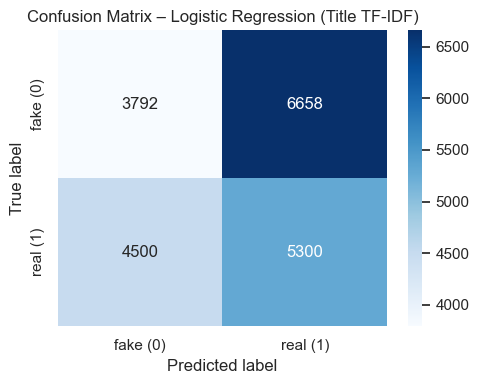


===== Logistic Regression (Text TF-IDF) =====
Accuracy : 0.4646
Precision: 0.4508
Recall   : 0.4863
F1-score : 0.4679
ROC-AUC  : 0.5213

Classification report:
              precision    recall  f1-score   support

    fake (0)       0.48      0.44      0.46     10450
    real (1)       0.45      0.49      0.47      9800

    accuracy                           0.46     20250
   macro avg       0.47      0.47      0.46     20250
weighted avg       0.47      0.46      0.46     20250



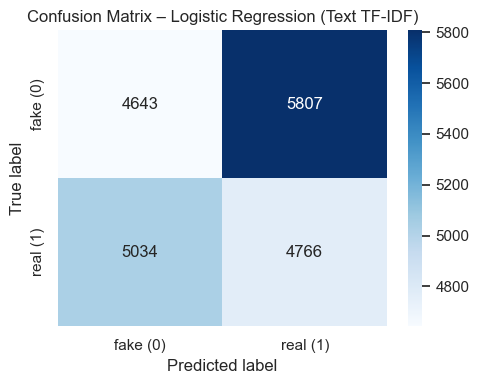


===== Logistic Regression (Title + Text TF-IDF) =====
Accuracy : 0.3887
Precision: 0.3795
Recall   : 0.4142
F1-score : 0.3961
ROC-AUC  : 0.4592

Classification report:
              precision    recall  f1-score   support

    fake (0)       0.40      0.36      0.38     10450
    real (1)       0.38      0.41      0.40      9800

    accuracy                           0.39     20250
   macro avg       0.39      0.39      0.39     20250
weighted avg       0.39      0.39      0.39     20250



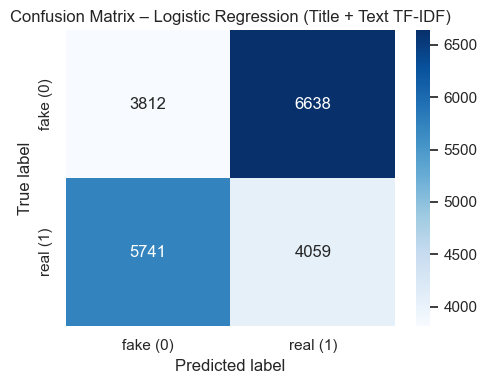

In [43]:
# Define a base Logistic Regression model
def make_log_reg():
    return LogisticRegression(
        solver="liblinear", max_iter=1000, class_weight="balanced"
    )


# 1) Title-only
logreg_title = make_log_reg()
y_pred_title_lr = evaluate_model(
    name="Logistic Regression (Title TF-IDF)",
    model=logreg_title,
    X_train=X_title_train,
    X_test=X_title_test,
    y_train=y_train,
    y_test=y_test,
    is_svm=False,
)
plot_confusion("Logistic Regression (Title TF-IDF)", y_test, y_pred_title_lr)

# 2) Text-only
logreg_text = make_log_reg()
y_pred_text_lr = evaluate_model(
    name="Logistic Regression (Text TF-IDF)",
    model=logreg_text,
    X_train=X_text_train,
    X_test=X_text_test,
    y_train=y_train,
    y_test=y_test,
    is_svm=False,
)
plot_confusion("Logistic Regression (Text TF-IDF)", y_test, y_pred_text_lr)

# 3) Title + Text combined
logreg_comb = make_log_reg()
y_pred_comb_lr = evaluate_model(
    name="Logistic Regression (Title + Text TF-IDF)",
    model=logreg_comb,
    X_train=X_comb_train,
    X_test=X_comb_test,
    y_train=y_train,
    y_test=y_test,
    is_svm=False,
)
plot_confusion("Logistic Regression (Title + Text TF-IDF)", y_test, y_pred_comb_lr)


===== Linear SVM (Title TF-IDF) =====


c:\Users\abdul\anaconda3\envs\cuda_test\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy : 0.3884
Precision: 0.3801
Recall   : 0.4182
F1-score : 0.3983
ROC-AUC  : 0.4230

Classification report:
              precision    recall  f1-score   support

    fake (0)       0.40      0.36      0.38     10450
    real (1)       0.38      0.42      0.40      9800

    accuracy                           0.39     20250
   macro avg       0.39      0.39      0.39     20250
weighted avg       0.39      0.39      0.39     20250



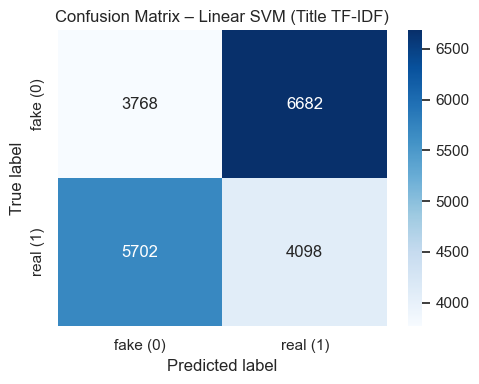


===== Linear SVM (Text TF-IDF) =====


c:\Users\abdul\anaconda3\envs\cuda_test\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy : 0.3360
Precision: 0.3201
Recall   : 0.3311
F1-score : 0.3255
ROC-AUC  : 0.3976

Classification report:
              precision    recall  f1-score   support

    fake (0)       0.35      0.34      0.35     10450
    real (1)       0.32      0.33      0.33      9800

    accuracy                           0.34     20250
   macro avg       0.34      0.34      0.34     20250
weighted avg       0.34      0.34      0.34     20250



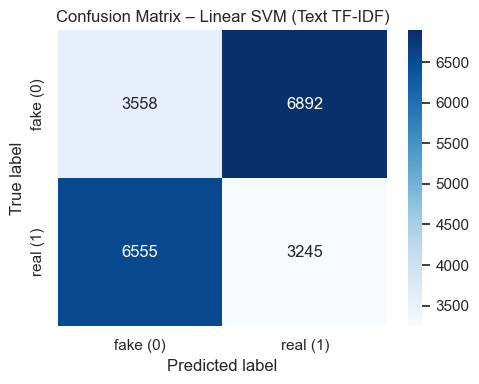


===== Linear SVM (Title + Text TF-IDF) =====


c:\Users\abdul\anaconda3\envs\cuda_test\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy : 0.3039
Precision: 0.2849
Recall   : 0.2904
F1-score : 0.2876
ROC-AUC  : 0.3756

Classification report:
              precision    recall  f1-score   support

    fake (0)       0.32      0.32      0.32     10450
    real (1)       0.28      0.29      0.29      9800

    accuracy                           0.30     20250
   macro avg       0.30      0.30      0.30     20250
weighted avg       0.30      0.30      0.30     20250



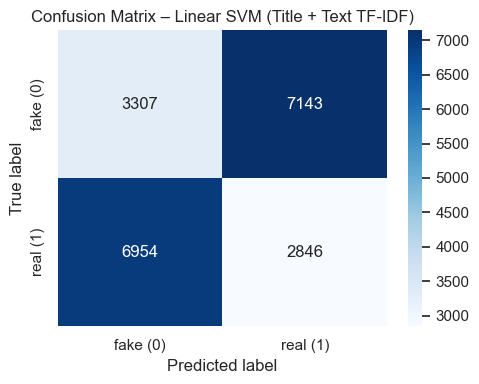

In [44]:
def make_linear_svc():
    return LinearSVC(class_weight="balanced", max_iter=2000)


# 1) Title-only
svc_title = make_linear_svc()
y_pred_title_svc = evaluate_model(
    name="Linear SVM (Title TF-IDF)",
    model=svc_title,
    X_train=X_title_train,
    X_test=X_title_test,
    y_train=y_train,
    y_test=y_test,
    is_svm=True,
)
plot_confusion("Linear SVM (Title TF-IDF)", y_test, y_pred_title_svc)

# 2) Text-only
svc_text = make_linear_svc()
y_pred_text_svc = evaluate_model(
    name="Linear SVM (Text TF-IDF)",
    model=svc_text,
    X_train=X_text_train,
    X_test=X_text_test,
    y_train=y_train,
    y_test=y_test,
    is_svm=True,
)
plot_confusion("Linear SVM (Text TF-IDF)", y_test, y_pred_text_svc)

# 3) Title + Text combined
svc_comb = make_linear_svc()
y_pred_comb_svc = evaluate_model(
    name="Linear SVM (Title + Text TF-IDF)",
    model=svc_comb,
    X_train=X_comb_train,
    X_test=X_comb_test,
    y_train=y_train,
    y_test=y_test,
    is_svm=True,
)
plot_confusion("Linear SVM (Title + Text TF-IDF)", y_test, y_pred_comb_svc)

In [46]:
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    roc_auc_score,
    confusion_matrix,
)


def evaluate_model(name, model, X_train, X_test, y_train, y_test, is_svm=False):
    """
    Fit the model, compute predictions, and print evaluation metrics.
    Return y_pred and a metrics dict for later tabulation.
    """
    print(f"\n===== {name} =====")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average="binary", pos_label=1
    )

    # Score for ROC-AUC
    if is_svm:
        scores = model.decision_function(X_test)
    else:
        scores = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, scores)

    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC-AUC  : {auc:.4f}")

    print("\nClassification report:")
    print(classification_report(y_test, y_pred, target_names=["fake (0)", "real (1)"]))

    metrics = {
        "model": name,
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": auc,
    }

    return y_pred, metrics

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


def make_log_reg():
    return LogisticRegression(
        solver="liblinear", max_iter=1000, class_weight="balanced"
    )


def make_linear_svc():
    return LinearSVC(class_weight="balanced", max_iter=2000)

In [48]:
all_metrics = []

# Logistic Regression
logreg_title = make_log_reg()
y_pred_title_lr, m_title_lr = evaluate_model(
    name="LogReg – Title TF-IDF",
    model=logreg_title,
    X_train=X_title_train,
    X_test=X_title_test,
    y_train=y_train,
    y_test=y_test,
    is_svm=False,
)
all_metrics.append(m_title_lr)

logreg_text = make_log_reg()
y_pred_text_lr, m_text_lr = evaluate_model(
    name="LogReg – Text TF-IDF",
    model=logreg_text,
    X_train=X_text_train,
    X_test=X_text_test,
    y_train=y_train,
    y_test=y_test,
    is_svm=False,
)
all_metrics.append(m_text_lr)

logreg_comb = make_log_reg()
y_pred_comb_lr, m_comb_lr = evaluate_model(
    name="LogReg – Title+Text TF-IDF",
    model=logreg_comb,
    X_train=X_comb_train,
    X_test=X_comb_test,
    y_train=y_train,
    y_test=y_test,
    is_svm=False,
)
all_metrics.append(m_comb_lr)

# Linear SVM
svc_title = make_linear_svc()
y_pred_title_svc, m_title_svc = evaluate_model(
    name="LinearSVM – Title TF-IDF",
    model=svc_title,
    X_train=X_title_train,
    X_test=X_title_test,
    y_train=y_train,
    y_test=y_test,
    is_svm=True,
)
all_metrics.append(m_title_svc)

svc_text = make_linear_svc()
y_pred_text_svc, m_text_svc = evaluate_model(
    name="LinearSVM – Text TF-IDF",
    model=svc_text,
    X_train=X_text_train,
    X_test=X_text_test,
    y_train=y_train,
    y_test=y_test,
    is_svm=True,
)
all_metrics.append(m_text_svc)

svc_comb = make_linear_svc()
y_pred_comb_svc, m_comb_svc = evaluate_model(
    name="LinearSVM – Title+Text TF-IDF",
    model=svc_comb,
    X_train=X_comb_train,
    X_test=X_comb_test,
    y_train=y_train,
    y_test=y_test,
    is_svm=True,
)
all_metrics.append(m_comb_svc)


===== LogReg – Title TF-IDF =====
Accuracy : 0.4490
Precision: 0.4432
Recall   : 0.5408
F1-score : 0.4872
ROC-AUC  : 0.4844

Classification report:
              precision    recall  f1-score   support

    fake (0)       0.46      0.36      0.40     10450
    real (1)       0.44      0.54      0.49      9800

    accuracy                           0.45     20250
   macro avg       0.45      0.45      0.45     20250
weighted avg       0.45      0.45      0.44     20250


===== LogReg – Text TF-IDF =====
Accuracy : 0.4646
Precision: 0.4508
Recall   : 0.4863
F1-score : 0.4679
ROC-AUC  : 0.5213

Classification report:
              precision    recall  f1-score   support

    fake (0)       0.48      0.44      0.46     10450
    real (1)       0.45      0.49      0.47      9800

    accuracy                           0.46     20250
   macro avg       0.47      0.47      0.46     20250
weighted avg       0.47      0.46      0.46     20250


===== LogReg – Title+Text TF-IDF =====
Accuracy 

c:\Users\abdul\anaconda3\envs\cuda_test\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy : 0.3884
Precision: 0.3801
Recall   : 0.4182
F1-score : 0.3983
ROC-AUC  : 0.4230

Classification report:
              precision    recall  f1-score   support

    fake (0)       0.40      0.36      0.38     10450
    real (1)       0.38      0.42      0.40      9800

    accuracy                           0.39     20250
   macro avg       0.39      0.39      0.39     20250
weighted avg       0.39      0.39      0.39     20250


===== LinearSVM – Text TF-IDF =====


c:\Users\abdul\anaconda3\envs\cuda_test\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy : 0.3360
Precision: 0.3201
Recall   : 0.3311
F1-score : 0.3255
ROC-AUC  : 0.3976

Classification report:
              precision    recall  f1-score   support

    fake (0)       0.35      0.34      0.35     10450
    real (1)       0.32      0.33      0.33      9800

    accuracy                           0.34     20250
   macro avg       0.34      0.34      0.34     20250
weighted avg       0.34      0.34      0.34     20250


===== LinearSVM – Title+Text TF-IDF =====


c:\Users\abdul\anaconda3\envs\cuda_test\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy : 0.3039
Precision: 0.2849
Recall   : 0.2904
F1-score : 0.2876
ROC-AUC  : 0.3756

Classification report:
              precision    recall  f1-score   support

    fake (0)       0.32      0.32      0.32     10450
    real (1)       0.28      0.29      0.29      9800

    accuracy                           0.30     20250
   macro avg       0.30      0.30      0.30     20250
weighted avg       0.30      0.30      0.30     20250



In [49]:
import pandas as pd

results_df = pd.DataFrame(all_metrics)
results_df

,model,accuracy,precision,recall,f1,roc_auc
0,LogReg – Title TF-IDF,0.448988,0.443218,0.540816,0.487177,0.484352
1,LogReg – Text TF-IDF,0.464642,0.450771,0.486327,0.467874,0.521252
2,LogReg – Title+Text TF-IDF,0.388691,0.379452,0.414184,0.396058,0.459210
3,LinearSVM – Title TF-IDF,0.388444,0.380148,0.418163,0.398251,0.422984
4,LinearSVM – Text TF-IDF,0.336000,0.320146,0.331122,0.325542,0.397604
5,LinearSVM – Title+Text TF-IDF,0.303852,0.284913,0.290408,0.287635,0.375567


In [50]:
results_df.to_csv("baseline_results.csv", index=False)

In [51]:
def add_more_metadata_features(df):
    # If not already present from EDA:
    if "title_len_words" not in df.columns:
        df["title_len_words"] = df["title"].str.split().str.len()
    if "text_len_words" not in df.columns:
        df["text_len_words"] = df["text"].str.split().str.len()
    if "title_len_chars" not in df.columns:
        df["title_len_chars"] = df["title"].str.len()
    if "text_len_chars" not in df.columns:
        df["text_len_chars"] = df["text"].str.len()

    # Count of "!" and "?" in title and text
    df["title_num_exclam"] = df["title"].str.count("!")
    df["title_num_question"] = df["title"].str.count(r"\?")
    df["text_num_exclam"] = df["text"].str.count("!")
    df["text_num_question"] = df["text"].str.count(r"\?")

    # Uppercase ratio in title (uppercase characters / total letters)
    def uppercase_ratio(s):
        if not isinstance(s, str) or len(s) == 0:
            return 0.0
        letters = [ch for ch in s if ch.isalpha()]
        if len(letters) == 0:
            return 0.0
        upper = sum(ch.isupper() for ch in letters)
        return upper / len(letters)

    df["title_upper_ratio"] = df["title"].apply(uppercase_ratio)

    return df


combined_df = add_more_metadata_features(combined_df)
combined_df.head()

,title,text,subject,date,label,label_name,source_dataset,title_len_words,text_len_words,title_len_chars,text_len_chars,language,punctuation_count,uppercase_ratio,numerical_count,sentiment_polarity,processed_title,processed_text,title_len,text_len,total_len,combined_processed_text,combined_text_title,title_clean,text_clean,title_num_exclam,title_num_question,text_num_exclam,text_num_question,title_upper_ratio
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,fake,ISOT,12,495,79,2893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,donald trump sends out embarrassing new year s...,donald trump just couldn t wish all americans ...,0,0,6,9,0.169231
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,fake,ISOT,8,305,69,1898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,0,0,0,0,0.131148
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,fake,ISOT,15,580,90,3597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sheriff david clarke becomes an internet joke ...,on friday it was revealed that former milwauke...,0,0,2,4,0.205479
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,fake,ISOT,14,444,78,2774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,trump is so obsessed he even has obama s name ...,on christmas day donald trump announced that h...,0,0,0,1,0.311475
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,fake,ISOT,11,420,70,2346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pope francis just called out donald trump duri...,pope francis used his annual christmas day mes...,0,0,0,0,0.186441


In [52]:
metadata_cols = [
    "title_len_words",
    "text_len_words",
    "title_len_chars",
    "text_len_chars",
    "title_num_exclam",
    "title_num_question",
    "text_num_exclam",
    "text_num_question",
    "title_upper_ratio",
]

X_meta = combined_df[metadata_cols].fillna(0).values

X_meta.shape, metadata_cols

((101250, 9),
 ['title_len_words',
  'text_len_words',
  'title_len_chars',
  'text_len_chars',
  'title_num_exclam',
  'title_num_question',
  'text_num_exclam',
  'text_num_question',
  'title_upper_ratio'])

In [53]:
from sklearn.model_selection import train_test_split

X_meta_train, X_meta_test, y_meta_train, y_meta_test = train_test_split(
    X_meta, y, test_size=0.2, random_state=42, stratify=y
)

print("Metadata train/test:", X_meta_train.shape, X_meta_test.shape)

Metadata train/test: (81000, 9) (20250, 9)



===== LogReg – Metadata only =====
Accuracy : 0.5383
Precision: 0.5203
Recall   : 0.5890
F1-score : 0.5525
ROC-AUC  : 0.5652

Classification report:
              precision    recall  f1-score   support

    fake (0)       0.56      0.49      0.52     10450
    real (1)       0.52      0.59      0.55      9800

    accuracy                           0.54     20250
   macro avg       0.54      0.54      0.54     20250
weighted avg       0.54      0.54      0.54     20250



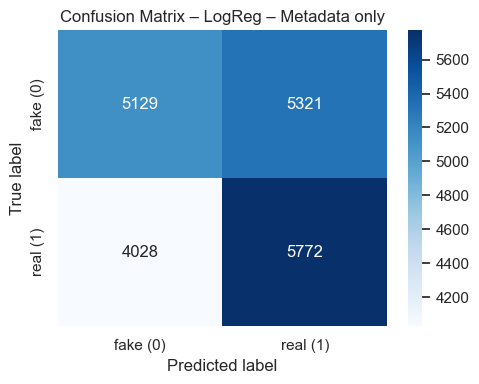

,model,accuracy,precision,recall,f1,roc_auc
0,LogReg – Title TF-IDF,0.448988,0.443218,0.540816,0.487177,0.484352
1,LogReg – Text TF-IDF,0.464642,0.450771,0.486327,0.467874,0.521252
2,LogReg – Title+Text TF-IDF,0.388691,0.379452,0.414184,0.396058,0.459210
3,LinearSVM – Title TF-IDF,0.388444,0.380148,0.418163,0.398251,0.422984
4,LinearSVM – Text TF-IDF,0.336000,0.320146,0.331122,0.325542,0.397604
5,LinearSVM – Title+Text TF-IDF,0.303852,0.284913,0.290408,0.287635,0.375567
6,LogReg – Metadata only,0.538321,0.520328,0.588980,0.552530,0.565248


In [54]:
logreg_meta = make_log_reg()
y_pred_meta_lr, m_meta_lr = evaluate_model(
    name="LogReg – Metadata only",
    model=logreg_meta,
    X_train=X_meta_train,
    X_test=X_meta_test,
    y_train=y_meta_train,
    y_test=y_meta_test,
    is_svm=False,
)

plot_confusion("LogReg – Metadata only", y_meta_test, y_pred_meta_lr)

all_metrics.append(m_meta_lr)
results_df = pd.DataFrame(all_metrics)
results_df

In [55]:
from scipy.sparse import csr_matrix, hstack

# Convert metadata train/test to sparse
X_meta_train_sparse = csr_matrix(X_meta_train)
X_meta_test_sparse = csr_matrix(X_meta_test)

# Combine with TF-IDF (Title+Text)
X_comb_meta_train = hstack([X_comb_train, X_meta_train_sparse])
X_comb_meta_test = hstack([X_comb_test, X_meta_test_sparse])

X_comb_meta_train.shape, X_comb_meta_test.shape

((81000, 70009), (20250, 70009))


===== LogReg – Title+Text TF-IDF + Metadata =====
Accuracy : 0.4919
Precision: 0.4787
Recall   : 0.5629
F1-score : 0.5174
ROC-AUC  : 0.5566

Classification report:
              precision    recall  f1-score   support

    fake (0)       0.51      0.43      0.46     10450
    real (1)       0.48      0.56      0.52      9800

    accuracy                           0.49     20250
   macro avg       0.49      0.49      0.49     20250
weighted avg       0.49      0.49      0.49     20250



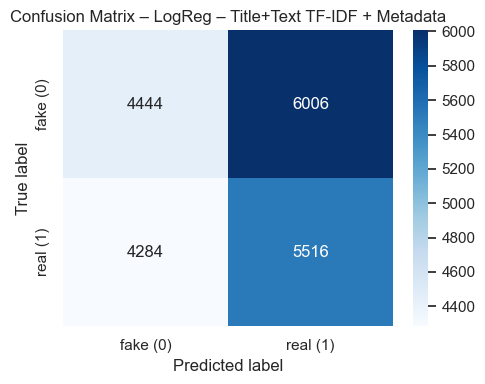

,model,accuracy,precision,recall,f1,roc_auc
0,LogReg – Title TF-IDF,0.448988,0.443218,0.540816,0.487177,0.484352
1,LogReg – Text TF-IDF,0.464642,0.450771,0.486327,0.467874,0.521252
2,LogReg – Title+Text TF-IDF,0.388691,0.379452,0.414184,0.396058,0.459210
3,LinearSVM – Title TF-IDF,0.388444,0.380148,0.418163,0.398251,0.422984
4,LinearSVM – Text TF-IDF,0.336000,0.320146,0.331122,0.325542,0.397604
5,LinearSVM – Title+Text TF-IDF,0.303852,0.284913,0.290408,0.287635,0.375567
6,LogReg – Metadata only,0.538321,0.520328,0.588980,0.552530,0.565248
7,LogReg – Title+Text TF-IDF + Metadata,0.491852,0.478736,0.562857,0.517400,0.556628


In [56]:
logreg_comb_meta = make_log_reg()
y_pred_comb_meta_lr, m_comb_meta_lr = evaluate_model(
    name="LogReg – Title+Text TF-IDF + Metadata",
    model=logreg_comb_meta,
    X_train=X_comb_meta_train,
    X_test=X_comb_meta_test,
    y_train=y_train,
    y_test=y_test,
    is_svm=False,
)

plot_confusion("LogReg – Title+Text TF-IDF + Metadata", y_test, y_pred_comb_meta_lr)

all_metrics.append(m_comb_meta_lr)
results_df = pd.DataFrame(all_metrics)
results_df


===== LinearSVM – Title+Text TF-IDF + Metadata =====


c:\Users\abdul\anaconda3\envs\cuda_test\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\abdul\anaconda3\envs\cuda_test\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy : 0.4851
Precision: 0.4845
Recall   : 0.9995
F1-score : 0.6527
ROC-AUC  : 0.4768

Classification report:
              precision    recall  f1-score   support

    fake (0)       0.85      0.00      0.01     10450
    real (1)       0.48      1.00      0.65      9800

    accuracy                           0.49     20250
   macro avg       0.67      0.50      0.33     20250
weighted avg       0.67      0.49      0.32     20250



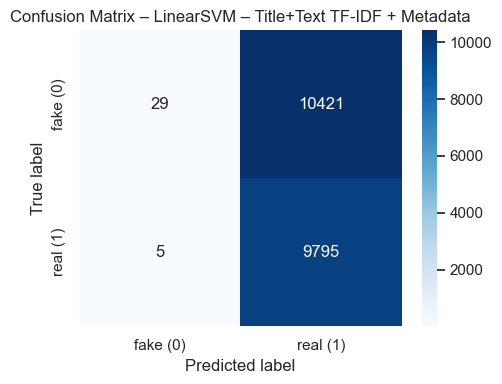

,model,accuracy,precision,recall,f1,roc_auc
0,LogReg – Title TF-IDF,0.448988,0.443218,0.540816,0.487177,0.484352
1,LogReg – Text TF-IDF,0.464642,0.450771,0.486327,0.467874,0.521252
2,LogReg – Title+Text TF-IDF,0.388691,0.379452,0.414184,0.396058,0.459210
3,LinearSVM – Title TF-IDF,0.388444,0.380148,0.418163,0.398251,0.422984
4,LinearSVM – Text TF-IDF,0.336000,0.320146,0.331122,0.325542,0.397604
5,LinearSVM – Title+Text TF-IDF,0.303852,0.284913,0.290408,0.287635,0.375567
6,LogReg – Metadata only,0.538321,0.520328,0.588980,0.552530,0.565248
7,LogReg – Title+Text TF-IDF + Metadata,0.491852,0.478736,0.562857,0.517400,0.556628
8,LinearSVM – Title+Text TF-IDF + Metadata,0.485136,0.484517,0.999490,0.652652,0.476797


In [57]:
svc_comb_meta = make_linear_svc()
y_pred_comb_meta_svc, m_comb_meta_svc = evaluate_model(
    name="LinearSVM – Title+Text TF-IDF + Metadata",
    model=svc_comb_meta,
    X_train=X_comb_meta_train,
    X_test=X_comb_meta_test,
    y_train=y_train,
    y_test=y_test,
    is_svm=True,
)

plot_confusion("LinearSVM – Title+Text TF-IDF + Metadata", y_test, y_pred_comb_meta_svc)

all_metrics.append(m_comb_meta_svc)
results_df = pd.DataFrame(all_metrics)
results_df